# COVID-19 Pandemic Analysis Project. 

# Data Citation
#### http://covidtracking.com/api/states/daily.csv (Getting first data)
#### https://covid.ourworldindata.org/data/owid-covid-data.csv (Getting second dataset for lockdown analysis)
#### https://github.com/altair-viz/altair (Documnetation of altair library)

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import pandas as pd
from scipy.stats import norm
import scipy.stats as st
from scipy.optimize import curve_fit
# if using a Jupyter notebook, inlcude:
%matplotlib inline

### Importing altair to use more statistical visulaization
# Github repository Citation: https://github.com/altair-viz/altair
###
import altair as alt



In [52]:
#####
#Importing data here from csv file using API key
####
data = pd.read_csv('http://covidtracking.com/api/states/daily.csv', parse_dates = ['date'])
data.describe()

,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,11535.000000,1.139700e+04,1334.000000,1.162300e+04,8806.000000,6591.000000,4954.000000,1881.00000,4153.000000,658.000000,...,11634.000000,1.163400e+04,11634.000000,11634.000000,11634.0,11634.0,11634.0,11634.0,11634.0,0.0
mean,50633.159428,5.636914e+05,1229.601949,6.169154e+05,878.934136,6711.856471,313.480218,1026.76555,138.455093,294.059271,...,8707.328692,6.024105e+05,16.921867,34.732766,0.0,0.0,0.0,0.0,0.0,NaN
std,100580.491971,1.200643e+06,5375.467606,1.287518e+06,1676.252772,14447.498956,564.526003,968.47082,230.298762,215.487938,...,16821.359449,1.281324e+06,46.918894,235.240807,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.00000,0.000000,2.000000,...,-336892.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,1435.500000,2.707700e+04,20.000000,2.533350e+04,98.000000,497.000000,56.000000,271.00000,25.000000,137.250000,...,522.000000,2.463550e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,12820.000000,1.660480e+05,157.500000,1.849850e+05,370.000000,2154.000000,134.000000,768.00000,75.000000,218.000000,...,3225.500000,1.734165e+05,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,55177.000000,5.768740e+05,521.000000,6.351665e+05,886.750000,6820.000000,293.000000,1450.00000,144.000000,395.000000,...,9580.750000,6.222848e+05,14.000000,23.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,802308.000000,1.353119e+07,64400.000000,1.433350e+07,18825.000000,89995.000000,5225.000000,5187.00000,2425.000000,1007.000000,...,187926.000000,1.433350e+07,951.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


In [53]:
data.info

<bound method DataFrame.info of             date state  positive   negative  pending  totalTestResults  \
0     2020-09-27    AK    8431.0   434554.0      NaN          442869.0   
1     2020-09-27    AL  152321.0   975685.0      NaN         1111239.0   
2     2020-09-27    AR   81242.0   861892.0      NaN          940627.0   
3     2020-09-27    AS       0.0     1571.0      NaN            1571.0   
4     2020-09-27    AZ  217237.0  1230608.0      NaN         1443323.0   
...          ...   ...       ...        ...      ...               ...   
11629 2020-01-24    WA       0.0        0.0      NaN               0.0   
11630 2020-01-23    MA       NaN        NaN      NaN               2.0   
11631 2020-01-23    WA       0.0        0.0      NaN               0.0   
11632 2020-01-22    MA       NaN        NaN      NaN               1.0   
11633 2020-01-22    WA       0.0        0.0      NaN               0.0   

       hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
0      

In [54]:
###
#Only focus on the USA
###
us = data[data['state'] == 'NY']
us.describe()

,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,208.000000,2.080000e+02,4.000000,2.080000e+02,195.000000,191.000000,186.000000,0.0,144.000000,0.0,...,208.000000,2.080000e+02,208.000000,208.000000,208.0,208.0,208.0,208.0,208.0,0.0
mean,320394.586538,3.420168e+06,130.000000,3.740562e+06,4343.415385,78939.340314,1303.725806,NaN,382.416667,NaN,...,50519.865385,3.740562e+06,122.384615,432.668269,0.0,0.0,0.0,0.0,0.0,NaN
std,143383.063819,3.133393e+06,122.398257,3.241048e+06,5601.859304,22825.582988,1659.527170,NaN,572.690076,NaN,...,27945.172177,3.241048e+06,210.011079,811.710462,0.0,0.0,0.0,0.0,0.0,NaN
min,6.000000,4.800000e+01,24.000000,5.400000e+01,325.000000,1531.000000,109.000000,NaN,47.000000,NaN,...,0.000000,5.400000e+01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,279504.750000,4.863352e+05,24.000000,7.658400e+05,548.000000,82463.500000,139.250000,NaN,61.750000,NaN,...,24963.000000,7.658400e+05,5.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,384259.500000,2.637234e+06,130.000000,3.021494e+06,996.000000,89995.000000,237.000000,NaN,95.000000,NaN,...,57080.500000,3.021494e+06,13.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,419106.500000,5.897241e+06,236.000000,6.316348e+06,6437.500000,89995.000000,2136.250000,NaN,396.250000,NaN,...,70945.750000,6.316348e+06,133.250000,453.500000,0.0,0.0,0.0,0.0,0.0,NaN
max,455626.000000,1.005256e+07,236.000000,1.050819e+07,18825.000000,89995.000000,5225.000000,NaN,2425.000000,NaN,...,110444.000000,1.050819e+07,951.000000,3424.000000,0.0,0.0,0.0,0.0,0.0,NaN


# Ploting the total cases vs total death as bar chart to be able to visualize it
### Using altair; Altair is a declarative statistical visualization library for Python

In [55]:
purple = alt.value('#b5ff')
plot_total = alt.Chart(us).mark_bar().encode(x='monthdate(date):O',).properties(width=400)

In [107]:

plot_total.encode(y='positiveIncrease').properties(title='NY Total positive cases per day')| plot_total.encode(y='negativeIncrease').properties(title='NY Total Negative per day')

alt.HConcatChart(...)

In [108]:
plot_total.encode(y='deathIncrease').properties(title='NY Total death per day')

alt.Chart(...)

In [109]:
#doing polynmial fits on positive and desthIncrease
y = us['positiveIncrease']
x = us['totalTestResultsIncrease']

#converting them to DataFrame so it can exported as a col and rows
# this will be better for the fit
source = pd.DataFrame({'x':x,'y':y})

#define the degree and color of the poly fits
degree = [5]
color_list = ['#5276A7', '#f2', '#b45']

#####
# using alt air for better statistcal graph
####
fit = alt.Chart(source).mark_circle(color='black').encode(alt.X('x'),alt.Y('y'))

polyFit = (fit.transform_regression('x', 'y', method='poly', order=order)
               .mark_line(color=color) 
               for order, color in zip(degree, color_list))

alt.layer(fit, *polyFit).properties(title='NY Daily Positive cases vs Daily Total test result')


alt.LayerChart(...)

In [113]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = data[data['state']==state][vary]
    x = data[data['state']==state][varx]
    
    if (x.nunique()!=1) and (y.nunique()!=1):
        
        
        
        
        plt.figure(figsize=(12,4))
        
        plt.title("NY daily \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='blue',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.xlabel('TotalTestResultsIncrease')
        plt.ylabel('TotalPositiveIncrease')
        plt.savefig('Dailytotaltest vs positive cases.png')
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

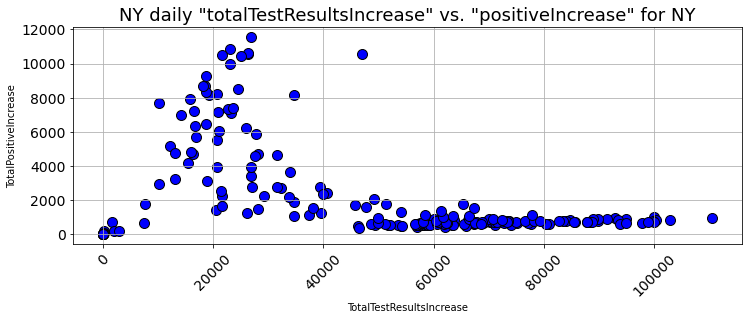

In [114]:
plot_xy(state='NY')




# Analysis using the day that the government announce the Isolation on the 18th of March.
### That will help us to see the new cases vs the total cases after being quarantined
#### I am separating the US data in different csv file to make it easier for me to do this analysis
#### As while I am doing the for loop i will face hard time to use the large file as it will take long time in running

In [83]:
lockdown = pd.read_csv('owid-covid-data.CSV')
lockdown.head()


FileNotFoundError: [Errno 2] File owid-covid-data.CSV does not exist: 'owid-covid-data.CSV'

In [84]:
tcases = lockdown['total_cases']
test = lockdown['new_tests']
lockdown.head()

NameError: name 'lockdown' is not defined

In [ ]:
y = []
testgrowth = []

In [ ]:
for i in range(1, len(test)):
    current = (tcases[i] - tcases[i-1])/(test[i] - test[i-1])*100
    testgrowth.append(test[i]-test[i-1])
    y.append(current)



In [ ]:
x = []
for i in range(1, len(y)+1):
    x.append([i])

In [ ]:
# I will make a vertical line here in order to show the start of the restriction laws that the USA made
# that will help us see the impact of this descision on the cases growth
day = 17
x_rest = [day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day,day]
y_rest = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

In [ ]:
# I will make another vertical line here in order to the effection of the restrictions on the new
# cases after 14 days of the isolation
eff = day + 14
x_effect = [eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff,eff]
y_effect = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]



In [ ]:
plt.scatter(x,y)
plt.plot(x_rest, y_rest, color = 'orange', linewidth = 3)
plt.plot(x_effect, y_effect, linewidth = 3)
plt.grid()
plt.xlabel('Days')
plt.ylabel("total cases in thousand")
plt.xlim(0,60)
plt.ylim(0,200)
plt.savefig("Qurantine Analysis.png")
plt.show()

# Function to plot the total tests happened and from thier we will conclude how that affect our data 

In [105]:
def CovidTest(lst_states=['NY','CT','UT','TX', 'PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Comparison of Daily test results",fontsize=18)
    for s in lst_states:
        data1 = np.array(data[data['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data1[-1]-data1[0])/len(data1))
        plt.plot(data1,linewidth=2)
        plt.text(x=len(data1)-2,y=data1[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data1)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total Daily test results",fontsize=16)
    plt.savefig("DailyTestResultperstate.png")
    plt.show()

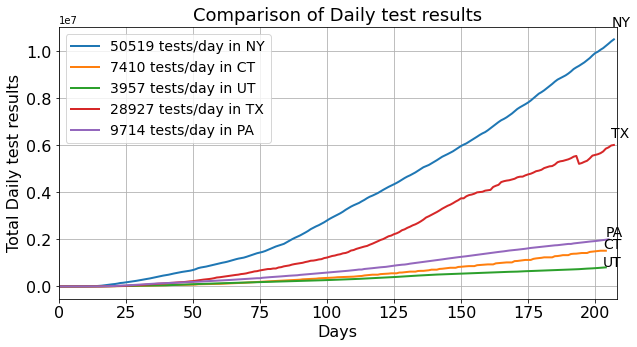

In [106]:
CovidTest()